In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

combien y a t-il de qubits ?  9


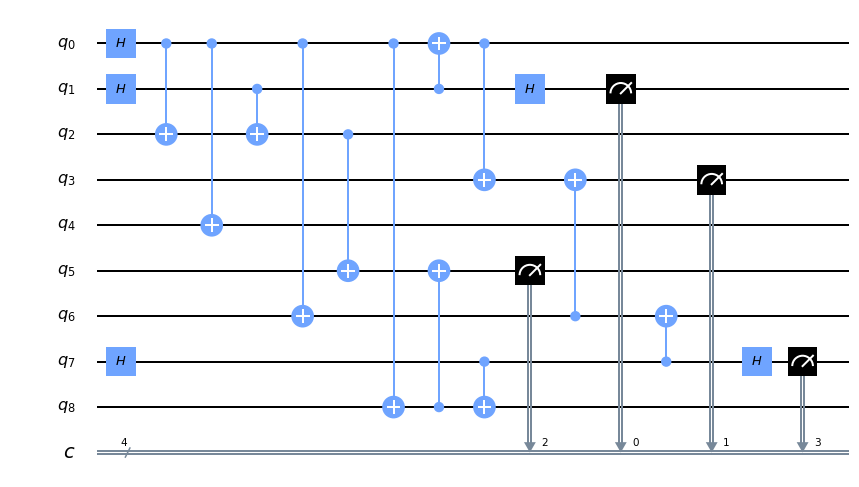

In [54]:
import numpy as np
from numpy import*
from qiskit import *
%matplotlib inline

#number of qubits
n=int(input("combien y a t-il de qubits ?  "))
circ = QuantumCircuit(n,int(n/2))
L=int(n**(1/2))

#def matrix
M=ones((L,L))
for i in range(L):
    for j in range(L):
        if (i+j)%2==0:
            M[i,j]=0


#encoding
circ.h(0)
for i in range(1,int(n/2)+1):
    circ.cx(0,2*i)


for i in range(L):
    for j in range(L):
        if M[i,j]==1:  #anscilla qubit
            if (i%2==0 and i!=0 and i!=L-1 and j!=0 and j!=L-1):    #C-Z operation
                circ.cx(L*i+j+1,L*i+j)
                circ.cx(L*i+j-1,L*i+j)
                circ.cx(L*i+j+L,L*i+j)
                circ.cx(L*i+j-L,L*i+j)
            elif (i%2==1 and i!=0 and i!=L-1 and j!=0 and j!=L-1):   #C-X operation
                circ.h(L*i+j)
                circ.cx(L*i+j,L*i+j+1)
                circ.cx(L*i+j,L*i+j-1)
                circ.cx(L*i+j,L*i+j+L)
                circ.cx(L*i+j,L*i+j-L)
            elif (j==0 or j==L-1):     #Frontière gauche/droite
                circ.cx(L*i+j-L,L*i+j)
                circ.cx(L*i+j+L,L*i+j)
            elif (i==0 or i==L-1):    #Frontière haut/bas
                circ.h(L*i+j)
                circ.cx(L*i+j,L*i+j+1)
                circ.cx(L*i+j,L*i+j-1)
                



#Measurements
k=0
for i in range(L):
    for j in range(L):
        if M[i,j]==1:          #anscilla qubit
            if j%2==0:   #C-Z
                circ.measure(i*L+j,k)
                k=k+1
            elif j%2==1 :     # C-X
                circ.h(i*L+j)
                circ.measure(i*L+j,k)
                k=k+1

#Zbasis
#circ.measure(3,0)
#circ.measure(5,1)
#Xbasis
#circ.h(1)
#circ.h(7)
#circ.measure(1,2)
#circ.measure(7,3)

circ.draw()






Credentials are already in use. The existing account in the session will be replaced.


{'1110': 133, '1111': 145, '0000': 102, '0111': 137, '1000': 127, '1001': 117, '0001': 132, '0110': 131}


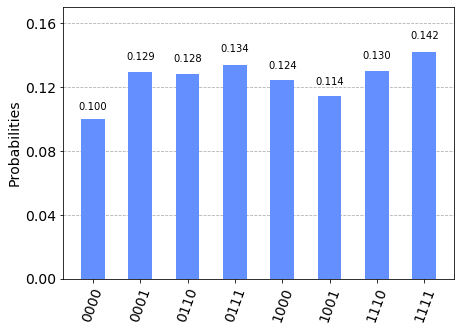

In [55]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)